In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import time

seed = 114514
%matplotlib inline


In [30]:
data = pd.read_csv("./bankloan.csv")
data.head()    # 展示数据的头部

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [31]:
# 对于字符转化成数值
data = data.replace({'b': 0, 'a': 1, 'u': 0, 'y': 1, 'l': 2, 'g': 0, 'p': 2, 'gg': 2, 'c': 0, 'q': 1, 'w': 2, 'i': 3, 'aa': 4, 'ff': 3, 'k': 6, 'cc': 7, 'm': 8, 'x': 9, 'd': 10, 'e': 11, 'j': 4, 'r': 13, 'v': 0, 'h': 1, 'bb': 2, 'z': 5, 'dd': 6, 'n': 7, 'o': 8, 't': 0, 'f': 1, 's': 1})


In [32]:
# 对于缺失的数据做众数填充
data.fillna(data.mode(numeric_only=True).iloc[0], inplace=True)


In [33]:
# 归一化
data = (data - data.min()) / (data.max() - data.min())

In [34]:
# 对数据进行分割（属性以及标签）
X = data.drop(['A16'], axis=1)
Y = data['A16']

In [36]:
# 特征选择

# 这里我们使用SelectKBest技术选择前十个最佳特征

selector = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(X, Y)

In [37]:

# 获取被选中的特征
feature_mask = selector.get_support()
selected_features = X.columns[feature_mask]
print(selected_features)

Index(['A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A14', 'A15'], dtype='object')


In [38]:
# 决策树模型，使用全部特征
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=seed)
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)   # 交叉熵

score = cross_val_score(clf, X, Y, cv=cv).mean()
print('entropyScore = ', score)


entropyScore =  0.7956521739130434


In [39]:

clf = tree.DecisionTreeClassifier(criterion='gini', random_state=seed)     # 基尼指数
score = cross_val_score(clf, X, Y, cv=cv).mean()
print('giniScore = ', score)

giniScore =  0.808695652173913


In [40]:
# 决策树模型，使用选择后的十个特征
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)   # 交叉熵
score = cross_val_score(clf, X_new, Y, cv=cv).mean()
print('entropyScore = ', score)


entropyScore =  0.8217391304347826


In [41]:

clf = tree.DecisionTreeClassifier(criterion='gini', random_state=seed)     # 基尼指数
score = cross_val_score(clf, X_new, Y, cv=cv).mean()
print('giniScore = ', score)

giniScore =  0.8014492753623189


In [42]:
# 优化参数 max_depth
start = time.time()
AllScore = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=seed)
for i in range(1, 16):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=seed)
    score = cross_val_score(clf, X_new, Y, cv=cv).mean()
    AllScore.append([i, score])
AllScore = np.array(AllScore)
end = time.time()


In [53]:



print('所耗时间为：', str(end - start))



所耗时间为： 88.32518005371094


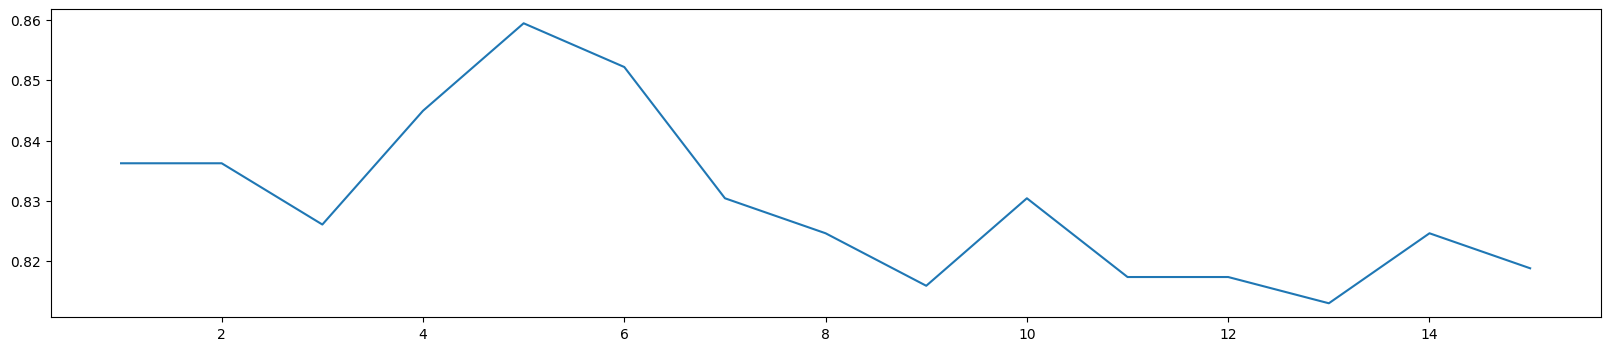

In [44]:

plt.figure(figsize=[20, 4])
plt.plot(AllScore[:, 0], AllScore[:, 1])
y1 = AllScore[:, 1]
plt.show()